In [ ]:
import pandas as pd

In [ ]:
import sqlite3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
con = sqlite3.connect('/content/drive/MyDrive/School21/d12/data/checking-logs.sqlite')

In [ ]:
page = pd.read_sql('''select datetime from pageviews where uid like 'user_%' ''', con)

In [ ]:
page['datetime'] = page['datetime'].astype('datetime64[ns]')

In [ ]:
page_cnt = page.groupby(page['datetime'].dt.date ).count()

In [10]:
commits = pd.read_sql('''select timestamp from checker where status = 'ready' and uid like 'user_%' ''', con)

In [11]:
commits

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104
...,...
1681,2020-05-21 20:01:48.959966
1682,2020-05-21 20:18:54.487900
1683,2020-05-21 20:19:06.872761
1684,2020-05-21 20:22:41.877806


In [12]:
commits['timestamp'] = commits['timestamp'].astype('datetime64[ns]')

In [13]:
commits_cnt = commits.groupby(commits['timestamp'].dt.date ).count()

In [14]:
commits_cnt

,timestamp
timestamp,
2020-04-17,13
2020-04-18,39
2020-04-19,18
2020-04-20,16
2020-04-21,13
2020-04-22,16
2020-04-23,24
2020-04-24,8
2020-04-25,57


In [16]:
df  = pd.merge(page_cnt, commits_cnt, how = 'inner', left_index=True, right_index=True)

In [17]:
df.shape

(32, 2)

In [18]:
df

,datetime,timestamp
2020-04-17,1,13
2020-04-18,23,39
2020-04-19,15,18
2020-04-21,3,13
2020-04-22,1,16
2020-04-23,5,24
2020-04-25,1,57
2020-04-26,8,137
2020-04-28,2,3
2020-04-29,4,9


Text(0.5, 0, 'date')

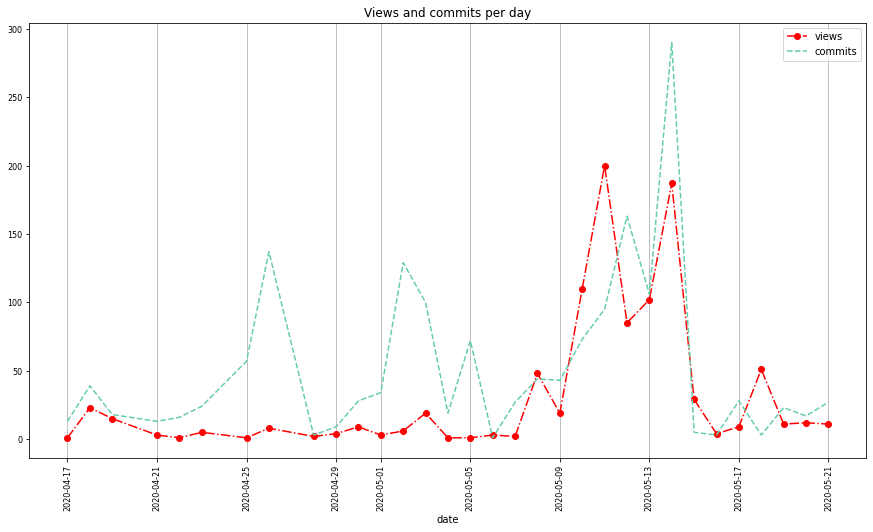

In [ ]:
plt = pd.merge(page_cnt, commits_cnt, how = 'inner', left_index=True, right_index=True)\
.plot(figsize = (15,8), fontsize = 8, title = 'Views and commits per day', rot = 90, style=['o-.','--'], color = {'datetime': '#FF0000', 'timestamp': '#66CDAA'})
plt.grid(axis='x')
plt.legend(['views','commits'])
plt.set_xlabel('date')

«Сколько раз количество просмотров превышало 150?»

«Ответ:2».